<a href="https://colab.research.google.com/github/husfuu/Mathematical-Modelling/blob/main/Modelling%20and%20Simulation%20in%20Python/Limits-to-Growth/Limits_to_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quadratic Growth

## Introduction

## Setup Libraries and Load the Data

In [2]:
# install Pint if necessary
try:
    import pint
except ImportError:
    !pip install pint

     |████████████████████████████████| 204 kB 5.1 MB/s 


In [3]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [4]:
# import functions from modsim

from modsim import *

In [5]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [6]:
import pandas as pd

from pandas import read_html

filename = 'World_population_estimates.html'
data = read_html(filename,
                   header=0, 
                   index_col=0,
                   decimal='M')

data = data[2]

# change data's columns name
data.columns = ['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj', 'thomlinson', 'durand', 'clark']

data.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Siapkan data yang akan dibandingkan dengan model yang akan kita buat.

In [7]:
census = data.census / 1e9
un = data.un / 1e9
print("======== census data ========")
print(census.head(8), "\n")
print("======== un data ========")
print(un.head(8))

======== census data ========
Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
1955    2.782099
1956    2.835300
1957    2.891350
Name: census, dtype: float64 

======== un data ========
Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
1955    2.761651
1956    2.811572
1957    2.863043
Name: un, dtype: float64


## Create a Model

Quadratic relationship code: <br>
`net_growth = system.alpha * pop + system.beta * pop**2`

In [8]:
def growth_func_quad(t, pop, system):
  return system.alpha * pop + system.beta * pop**2

Berikut adalah `System` object yang akan digunakan untuk kasus ini. <br>
* `t_0` = waktu awal
* `t_end` = waktu akhir
* `p_0` = jumlah populasi awal


In [9]:
t_0 = census.index[0]         # 1950
p_0 = census[t_0]             # 2.557628654
t_end = census.index[-1]      # 2016

system = System(t_0 = t_0, p_0 = p_0, t_end = t_end)
system

System(p_0=2.557628654, t_0=1950, t_end=2016)

Menambahkan parameter `beta` dan `alpha` ke dalam `system` kita.

In [10]:
system.alpha = 25/1000
system.beta = -1.8/1000
system

System(alpha=0.025, beta=-0.0018, p_0=2.557628654, t_0=1950, t_end=2016)

Jalankan simulasi

In [11]:
def run_simulation(system, growth_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in range(system.t_0, system.t_end):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth
        
    return results

In [12]:
model_results = run_simulation(system, growth_func_quad)

In [13]:
model_results

Time
1950    2.557629
1951    2.609795
1952    2.662780
1953    2.716587
1954    2.771217
          ...   
2012    7.135843
2013    7.222583
2014    7.309249
2015    7.395815
2016    7.482254
Name: Quantity, Length: 67, dtype: float64

## Plot the Model
Di sini kita akan membuat line plot yang bertujuan untuk membandingkan hasil dari model yang sudah dibuat dengan data aslinya.

Kombinasikan data asli dengan data yang digenerate oleh model.


In [14]:
import pandas as pd

data_combined = pd.concat([model_results, census, un], axis=1)

# rename the columns name
data_combined.columns = ['model', 'census', 'un']

In [15]:
data_combined.head()

,model,census,un
1950,2.557629,2.557629,2.525149
1951,2.609795,2.594940,2.572851
1952,2.662780,2.636772,2.619292
1953,2.716587,2.682053,2.665865
1954,2.771217,2.730228,2.713172


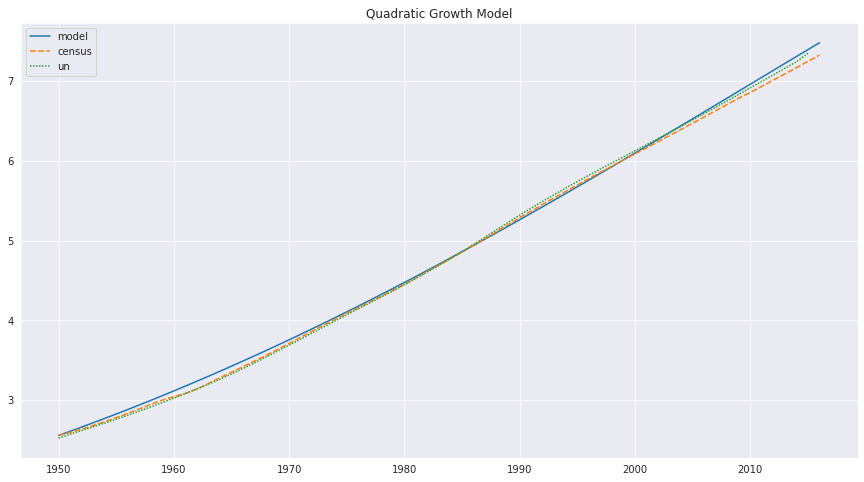

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.set_style('darkgrid')
p = sns.lineplot(data = data_combined).set(title="Quadratic Growth Model")

Model fit dengan data hampir di seluruh interval tahun, walaupun ada sedikit ruang antara model dengan data sebenarnya di tahun 1960-an. <br>

Model quadratic lebih cocok daripada model konstan dan proporsional, karena model ini memiliki 2 paramater yang dapat dipilih dibandingkan kedua model sebelumnya yang hanya memiliki 1 parameter.
Secara umum semakin banyak parameter yang dapat dimiliki, semakin berpotensi model tersebut fit dengan baik.

**NOTE:** <br>
Model yang fit dengan data asli bukanlah satu-satunya alasan untuk berpikir bahwa model quadratic mungkin merupakan pilihan yang bagus.

# Net Growth

* Buat graphic yang menggambarkan hubungan antara **growth** dan **population** dengan menggunakan model quadratic.

* Generate sebuah data yang memiliki 101 populasi yang setiap jumlah orang di populasi-populasi tersebut berada di interval 0 sampai 15 miliar.


In [1]:
import numpy as np

pop_array = np.linspace(0, 15, 101)

pop_array

array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ,
        1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,  2.4 ,  2.55,
        2.7 ,  2.85,  3.  ,  3.15,  3.3 ,  3.45,  3.6 ,  3.75,  3.9 ,
        4.05,  4.2 ,  4.35,  4.5 ,  4.65,  4.8 ,  4.95,  5.1 ,  5.25,
        5.4 ,  5.55,  5.7 ,  5.85,  6.  ,  6.15,  6.3 ,  6.45,  6.6 ,
        6.75,  6.9 ,  7.05,  7.2 ,  7.35,  7.5 ,  7.65,  7.8 ,  7.95,
        8.1 ,  8.25,  8.4 ,  8.55,  8.7 ,  8.85,  9.  ,  9.15,  9.3 ,
        9.45,  9.6 ,  9.75,  9.9 , 10.05, 10.2 , 10.35, 10.5 , 10.65,
       10.8 , 10.95, 11.1 , 11.25, 11.4 , 11.55, 11.7 , 11.85, 12.  ,
       12.15, 12.3 , 12.45, 12.6 , 12.75, 12.9 , 13.05, 13.2 , 13.35,
       13.5 , 13.65, 13.8 , 13.95, 14.1 , 14.25, 14.4 , 14.55, 14.7 ,
       14.85, 15.  ])

Dengan menggunakan model quadratic untuk menghitung pertumbuhan populasi (**growth**)
 untuk setiap populasi.

In [22]:
growth_array = system.alpha * pop_array + system.beta *pop_array**2
growth_array

array([ 0.       ,  0.0037095,  0.007338 ,  0.0108855,  0.014352 ,
        0.0177375,  0.021042 ,  0.0242655,  0.027408 ,  0.0304695,
        0.03345  ,  0.0363495,  0.039168 ,  0.0419055,  0.044562 ,
        0.0471375,  0.049632 ,  0.0520455,  0.054378 ,  0.0566295,
        0.0588   ,  0.0608895,  0.062898 ,  0.0648255,  0.066672 ,
        0.0684375,  0.070122 ,  0.0717255,  0.073248 ,  0.0746895,
        0.07605  ,  0.0773295,  0.078528 ,  0.0796455,  0.080682 ,
        0.0816375,  0.082512 ,  0.0833055,  0.084018 ,  0.0846495,
        0.0852   ,  0.0856695,  0.086058 ,  0.0863655,  0.086592 ,
        0.0867375,  0.086802 ,  0.0867855,  0.086688 ,  0.0865095,
        0.08625  ,  0.0859095,  0.085488 ,  0.0849855,  0.084402 ,
        0.0837375,  0.082992 ,  0.0821655,  0.081258 ,  0.0802695,
        0.0792   ,  0.0780495,  0.076818 ,  0.0755055,  0.074112 ,
        0.0726375,  0.071082 ,  0.0694455,  0.067728 ,  0.0659295,
        0.06405  ,  0.0620895,  0.060048 ,  0.0579255,  0.0557

Sekarang kita sudah punya data **population** dan **growth**, selanjutnya bikin graph yang mengambarkan hubungan kedua data ini. 

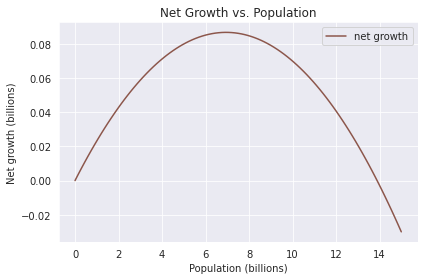

In [29]:
plt.plot(pop_array, growt_array, label='net growth', color='C5')

decorate(xlabel='Population (billions)',
         ylabel='Net growth (billions)',
         title='Net Growth vs. Population')

**Model's Behavior**:<br>
* Ketika populasi kurang dari 3 miliar, net growth proporsional terhadap populasi atau sebanding dengan populasi, seperti pada model proporsional. Dalam interval tersebut populasi tumbuh lambat karena populasinya sedikit.
* Di interval 3 miliar sampai 10 miliar, populasi tumbuh lebih cepat karena sudah banyak jumlah orang di interval tersebut, setidaknya lebih banyak daripada interval sebelumnya.
* Di atas 10 miliar, populasi tumbuh lebih lambat, behavior ini adalah efek dari keterbatasan sumber daya yang menurunkan angka kelahiran atau meningkatnya angka kematian.
* Di atas 14 miliar, sumber daya menjadi sangat terbatas sehingga angka kematian melebihi angka kelahiran dan pertumbuhan bersih menjadi negatif.